# K-means clustring

In [173]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [174]:
# load dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [175]:
# model

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import data in features
X = df[['age', 'fare']]
X['age'] = X['age'].fillna(value=X['age'].mean())

# scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform clustring
model = KMeans(n_clusters=5)
model.fit(X_scaled)

# assign cluster to the data
df['cluster'] = model.labels_

C:\Users\KING\AppData\Local\Temp\ipykernel_2840\2421692066.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [177]:
df['cluster'].unique()

array([3, 4, 0, 2, 1], dtype=int32)

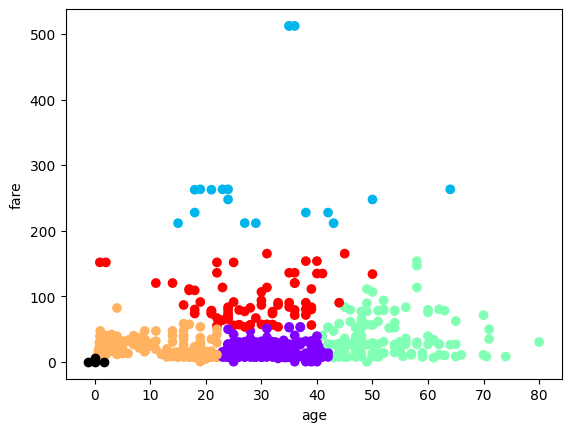

In [178]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

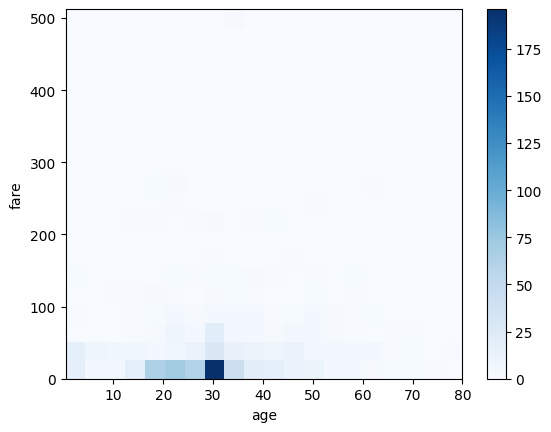

In [179]:
plt.figure()
plt.hist2d(X['age'], X['fare'], bins=20, cmap='Blues')
plt.colorbar()
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

In [180]:
import plotly.express as px
fig = px.scatter(df, x='age', y='fare', color='cluster')
fig.show()

In [182]:
fig = px.scatter_3d(df, x='age', y='fare', z='pclass', color='cluster')
fig.show()

In [183]:
fig = px.parallel_coordinates(df, color='cluster', title='Titanic Clusters')
fig.show()